In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import three_parameter_screening as tps
import pandas as pd

## Data Generation
Uses the Inverse Transform Method
<a class="anchor" id="inverse_transform"></a>

In [4]:
rng = np.random.default_rng(seed=42)
t_w = tps.transition_survival_rvs(rng, w=0.001, size=1000000)
t_q = tps.sojourn_survival_rvs(rng, mu=1, t_w=t_w)
age_cutoff = 100

## Model Exploration

### Preclinical Transition Exploration

In [5]:
t_w_df = pd.DataFrame({
    't_w': t_w
})
print(t_w_df.describe())

                  t_w
count  1000000.000000
mean       500.026476
std        288.635568
min          0.000125
25%        249.990623
50%        499.810121
75%        750.106231
max        999.999717


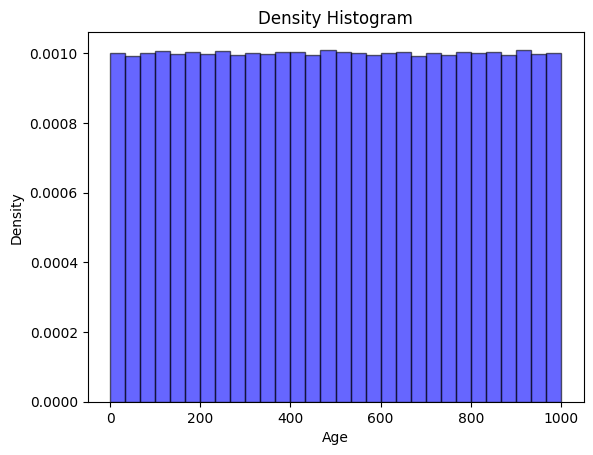

In [6]:
# Plot histogram with density=True
plt.hist(t_w, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Histogram')

# Show plot
plt.show()

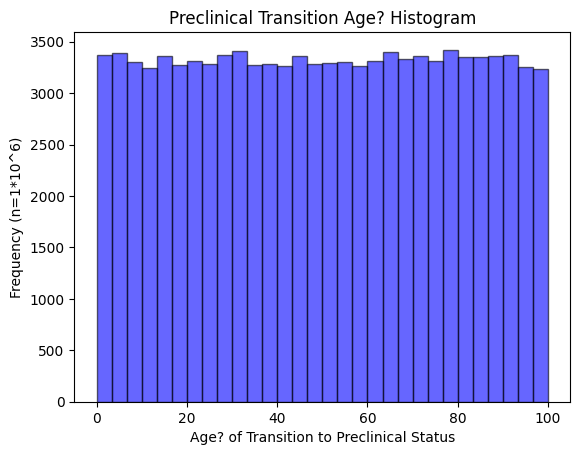

In [7]:
t_w_cutoff = t_w[t_w < age_cutoff]
# Plot histogram with density=True
plt.hist(t_w_cutoff, bins=30, density=False, alpha=0.6, color='b', edgecolor='black')

# Labels and title
plt.xlabel('Age? of Transition to Preclinical Status')
plt.ylabel('Frequency (n=1*10^6)')
plt.title('Preclinical Transition Age? Histogram')

# Show plot
plt.show()

In [23]:
t_w_cutoff

array([94.17734789, 63.8172561 , 43.80376579, ..., 66.94287416,
       29.59360772, 18.48943743], shape=(99714,))

In [25]:
len(t_w_cutoff)/len(t_w)

0.099714

In [26]:
preclinical_percentage = len(t_w_cutoff)/len(t_w)
print("lifetime_preclinical_percentage: ", preclinical_percentage)

# Tells us what percentage of people will go to preclinical state in their lifetime

lifetime_preclinical_percentage:  0.099714


### Clinical Transition Exploration
See [Inverse Transform](#inverse_transform) for data source.

                  t_q
count  1000000.000000
mean         0.999463
std          1.000218
min          0.000004
25%          0.287533
50%          0.692339
75%          1.385773
max         15.131814


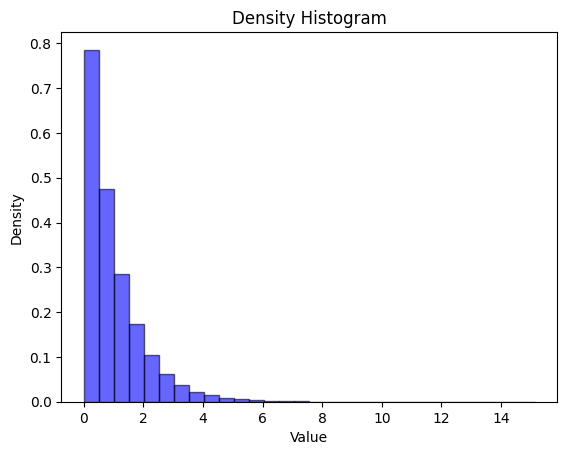

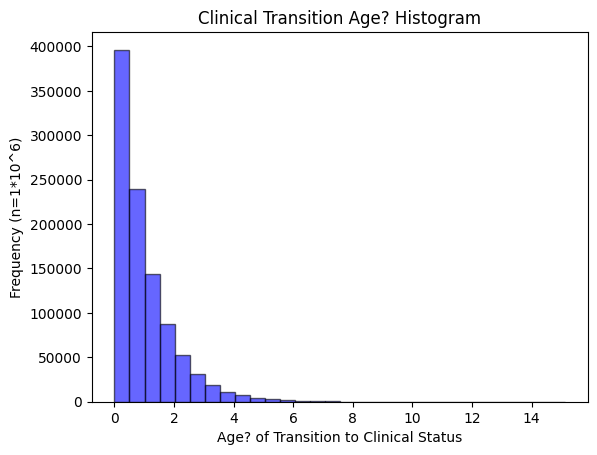

In [9]:
t_q_df = pd.DataFrame({
    't_q': t_q
})

print(t_q_df.describe())
plt.hist(t_q, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Histogram')
plt.show()

t_q_cutoff = t_q[t_q < age_cutoff]

# Plot histogram with density=True
plt.hist(t_q_cutoff, bins=30, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Age? of Transition to Clinical Status')
plt.ylabel('Frequency (n=1*10^6)')
plt.title('Clinical Transition Age? Histogram')
plt.show()

### Combined Verification

In [10]:
# Create a dataframe with the transitions
transitions_df = pd.DataFrame({
    'first_transition': t_w,
    'second_transition': t_w + t_q,
    'sojourn_time': t_q
})

# Display the first few rows to verify
transitions_df.head()

first_transition  second_transition  sojourn_time
0        773.956049         775.156064      1.200016
1        438.878440         439.497455      0.619015
2        858.597920         858.613326      0.015406
3        697.368029         697.777527      0.409498
4         94.177348          95.061607      0.884259

In [27]:
# Filter the dataframe so only persons with d_w <= age_cutoff remain
filtered_transitions_df = transitions_df[transitions_df['first_transition'] <= age_cutoff]

# Print the shape to see how many rows remain
print(f"Original shape: {transitions_df.shape}")
print(f"Filtered shape: {filtered_transitions_df.shape}")

# Display the first few rows of the filtered dataframe
filtered_transitions_df.head()

Original shape: (1000000, 3)
Filtered shape: (99714, 3)


first_transition  second_transition  sojourn_time
4          94.177348          95.061607      0.884259
17         63.817256          66.938448      3.121192
27         43.803766          45.038359      1.234593
51          7.362270           8.573102      1.210833
68         30.817835          30.993871      0.176037

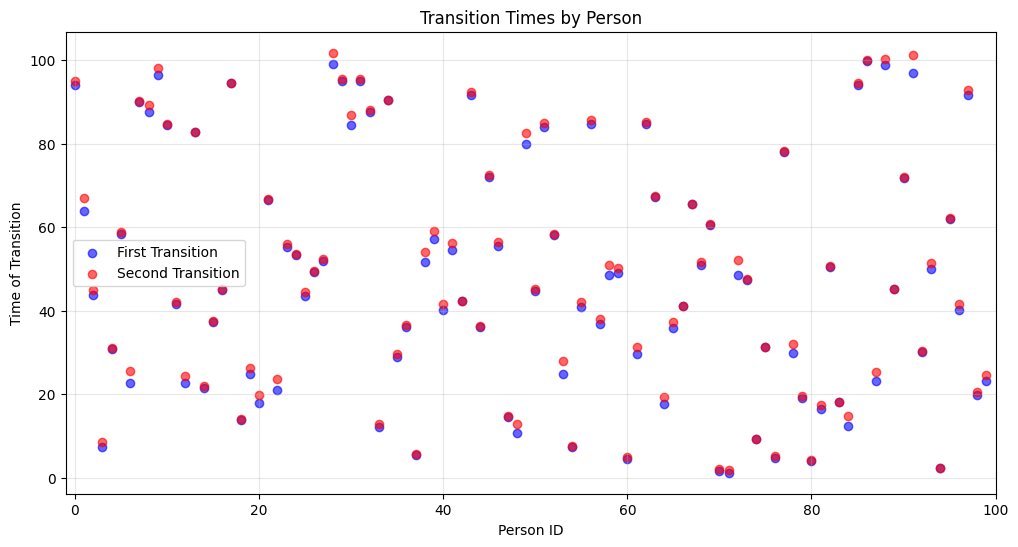

In [12]:
preview_amount = 100
# Create a figure with a reasonable size
plt.figure(figsize=(12, 6))

# Plot first transitions in one color and second transitions in another
plt.scatter(range(preview_amount), filtered_transitions_df['first_transition'][:preview_amount], 
           label='First Transition', alpha=0.6, color='blue')
plt.scatter(range(preview_amount), filtered_transitions_df['second_transition'][:preview_amount], 
           label='Second Transition', alpha=0.6, color='red')

# Customize the plot
plt.xlabel('Person ID')
plt.ylabel('Time of Transition')
plt.title('Transition Times by Person')
plt.legend()

# If there are many points, limit the x-axis to show first 100 persons for better visibility
plt.xlim(-1, 100)  # Adjust this number based on how many points you want to see

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

#### Integral Verification

In [30]:
filtered_transitions_df

first_transition  second_transition  sojourn_time
4              94.177348          95.061607      0.884259
17             63.817256          66.938448      3.121192
27             43.803766          45.038359      1.234593
51              7.362270           8.573102      1.210833
68             30.817835          30.993871      0.176037
...                  ...                ...           ...
999968         26.630438          28.168056      1.537619
999977         39.125133          39.940033      0.814900
999978         66.942874          68.587374      1.644500
999992         29.593608          29.960425      0.366817
999993         18.489437          18.640261      0.150824

[99714 rows x 3 columns]

In [ ]:
n = filtered_transitions_df.shape[0]

# Convert the columns to numpy arrays and sort them.
first_transitions = np.sort(filtered_transitions_df['first_transition'].values)
second_transitions = np.sort(filtered_transitions_df['second_transition'].values)

ages = np.arange(age_cutoff)

# For each age in 'ages', the number of preclinical transitions (first_transition <= age)
# is given by the insertion point on the right:
# searchsorted return indeces where new elements shall be placed in a sorted array in order for
# the array to stay sorted. If two elements are equal, the index of the new element will be
# as if it were placed on the right of the existing element in this case. 
preclinical_transition_riemann = np.searchsorted(first_transitions, ages, side='right')/n

# For clinical transitions, we need the count of rows with second_transition >= age.
# That equals the total count minus the number with second_transition < age.
clinical_transition_riemann = (len(second_transitions) - np.searchsorted(second_transitions, ages, side='left'))/n

In [ ]:
# The first value is the relative number of people who experianced the transition S_0 -> S_P
# before age 0, the next is the same but before reaching age 1, then before reaching age 2
# and so on.

preclinical_transition_riemann

array([0.        , 0.01004874, 0.02049863, 0.03041699, 0.04085685,
       0.05124657, 0.0610847 , 0.07097298, 0.08085123, 0.0907696 ,
       0.10092866, 0.11053613, 0.12076539, 0.13018232, 0.14004052,
       0.15031991, 0.16057926, 0.17038731, 0.18034579, 0.19025413,
       0.19998195, 0.2098602 , 0.21994905, 0.22941613, 0.23977576,
       0.24936318, 0.25941192, 0.26962112, 0.27933891, 0.28930742,
       0.29995788, 0.30974587, 0.32033616, 0.33075596, 0.3405941 ,
       0.3506629 , 0.36071164, 0.37031911, 0.38012716, 0.3899653 ,
       0.39988367, 0.40985218, 0.4197204 , 0.42924765, 0.43942676,
       0.44941533, 0.4596847 , 0.46957298, 0.47999278, 0.48942977,
       0.49936819, 0.50904587, 0.51889404, 0.52920352, 0.53870068,
       0.54890988, 0.55868785, 0.56874662, 0.57871513, 0.58847303,
       0.59820085, 0.60824959, 0.61799747, 0.6279359 , 0.63858636,
       0.64836432, 0.65867381, 0.66871252, 0.67886154, 0.68904066,
       0.69889885, 0.70914816, 0.71940751, 0.72909521, 0.73911

In [36]:
# Relative number of people whose second trasnition is time is >= their age

clinical_transition_riemann

array([1.        , 0.99623924, 0.98875785, 0.9795816 , 0.96966324,
       0.95931364, 0.94911447, 0.9394769 , 0.92930782, 0.9193694 ,
       0.90921034, 0.89960286, 0.88952404, 0.8796859 , 0.87022885,
       0.85977897, 0.8493692 , 0.83947089, 0.82965281, 0.81973444,
       0.80959544, 0.79987765, 0.7899994 , 0.78015123, 0.77019275,
       0.76018413, 0.75029585, 0.74067834, 0.73057946, 0.72047055,
       0.71017109, 0.70026275, 0.68980284, 0.67980424, 0.66942455,
       0.65979702, 0.64950759, 0.63956917, 0.62947029, 0.61987284,
       0.6097539 , 0.60023668, 0.59032834, 0.58022946, 0.57068215,
       0.5607337 , 0.55068496, 0.5405961 , 0.5301061 , 0.52045851,
       0.51040977, 0.5009427 , 0.49142548, 0.48132659, 0.47067613,
       0.46080791, 0.45109012, 0.44123192, 0.43121327, 0.42135508,
       0.411888  , 0.40177909, 0.39179052, 0.38205267, 0.37190364,
       0.36176465, 0.35186634, 0.34157691, 0.3313978 , 0.32094791,
       0.31093929, 0.3006298 , 0.29027017, 0.28048218, 0.27051

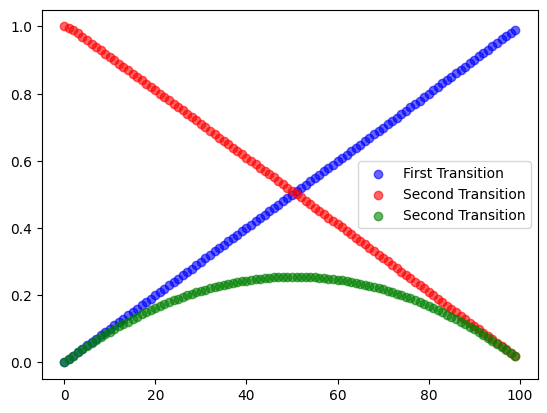

In [33]:
plt.scatter(range(len(preclinical_transition_riemann)), preclinical_transition_riemann, 
           label='First Transition', alpha=0.6, color='blue')
plt.scatter(range(len(clinical_transition_riemann)), clinical_transition_riemann, 
           label='Second Transition', alpha=0.6, color='red')
plt.scatter(range(len(clinical_transition_riemann)), 
            preclinical_transition_riemann * clinical_transition_riemann, 
           label='Second Transition', alpha=0.6, color='green')
plt.legend()
plt.show()

## History Generation

In [15]:
def determine_screening_times(t_w, t_q, screening_times, beta, detection_rule=None):
    """
    Determines which screening times a person undergoes given preclinical (t_w) and clinical (t_q) transition times.
    This version includes all screening times between t_w and t_q (as a list) and uses a Bernoulli trial with probability beta 
    at each screening time to decide detection. Once a detection occurs, the screening schedule may be modified via detection_rule.
    
    Parameters:
      t_w (np.array): 1D array of preclinical transition times (onset) for each person.
      t_q (np.array): 1D array of clinical transition times for each person.
      screening_times (np.array): 1D sorted array of scheduled screening times.
      beta (float): Detection probability for a screening (Bernoulli probability).
      detection_rule (function, optional): Function that takes (detection_time, screening_times) and returns extra screening times 
                                           after detection.
      
    Returns:
      results_df (pd.DataFrame): DataFrame with columns:
           't_w' - preclinical transition time,
           't_q' - clinical transition time,
           'all_screening_times' - list of all scheduled screenings between t_w and t_q,
           'final_screening_times' - list of screenings up to (and including) detection (with possible additions),
           'detected' - Boolean indicating if detection occurred,
           'detection_time' - Time at which detection occurred (or np.nan if none).
    """
    # Convert inputs to numpy arrays (if not already)
    t_w = np.asarray(t_w)
    t_q = np.asarray(t_q)
    screening_times = np.asarray(screening_times)
    
    print(t_w.shape)
    n = t_w.shape[0]
    
    # Precompute indices for the screening_times that fall within [t_w, t_q) for each person.
    lower_idx = np.searchsorted(screening_times, t_w, side='left')
    upper_idx = np.searchsorted(screening_times, t_q, side='left')

    # Consider using list comprehension
    # validScrTimes=[t for t in screeningTime if t > t_w]
    # validScrTimes=[t for t in validScrTime if t < t_q]
    
    results = []
    
    for i in range(n):
        # Get all screening times between t_w[i] and t_q[i]
        valid_screenings = screening_times[lower_idx[i]:upper_idx[i]]
        all_screenings = list(valid_screenings)
        
        final_screenings = []
        detection_occurred = False
        detection_time = np.nan
        
        # Simulate detection at each screening within the valid interval.
        for t in valid_screenings:
            final_screenings.append(t)
            # Bernoulli trial: detection occurs if random number < beta.
            if np.random.rand() < beta:
                detection_occurred = True
                detection_time = t
                if detection_rule is not None:
                    final_screenings.extend(detection_rule(t, screening_times))
                break  # Stop further screenings after detection
        
        # If no detection occurred, final screenings remain as all valid screenings.
        if not detection_occurred:
            final_screenings = all_screenings
            
        results.append({
            "t_w": t_w[i],
            "t_q": t_q[i],
            "all_screening_times": all_screenings,
            "final_screening_times": final_screenings,
            "detected": detection_occurred,
            "detection_time": detection_time
        })
    
    results_df = pd.DataFrame(results)
    return results_df

In [16]:
def detection_rule(t_detection, screening_times):
    """
    Adjusts screening schedule after detection.
    Example: Schedule additional screenings every 0.5 time units for the next 2 periods.
    
    Parameters:
    - t_detection (float): The time at which detection occurred.
    - screening_times (np.array): Original screening schedule.
    
    Returns:
    - new_screenings (list): List of new screening times.
    """
    return [t_detection + 0.5, t_detection + 1.0]  # Example new schedule

In [17]:
beta = 0.9 # From original problem formulation
screening_interval = 1 # Assume screening occurs every year
screening_times = np.arange(40, 91, screening_interval) 
# Generous interpretation of ACS Breast Cancer Screening Guidelines | American Cancer Society
# https://www.cancer.org/cancer/types/breast-cancer/screening-tests-and-early-detection/american-cancer-society-recommendations-for-the-early-detection-of-breast-cancer.html

histories = determine_screening_times(filtered_transitions_df['first_transition'], 
    filtered_transitions_df['second_transition'], screening_times, beta)



# first = np.searchsorted(screening_times, t_w_cutoff, side='left')
# last = np.searchsorted(screening_times, (t_c), side='right')
# print(screening_times[first[0]])
# print(screening_times[last[0]])
# print(t_w_cutoff[0])
# print(t_c[0])
# print(screening_times[95:96])

(99714,)


In [18]:
histories.head(10)

t_w        t_q all_screening_times final_screening_times  detected  \
0  94.177348  95.061607                  []                    []     False   
1  63.817256  66.938448        [64, 65, 66]                  [64]      True   
2  43.803766  45.038359            [44, 45]              [44, 45]      True   
3   7.362270   8.573102                  []                    []     False   
4  30.817835  30.993871                  []                    []     False   
5  58.302742  58.817196                  []                    []     False   
6  22.712073  25.674626                  []                    []     False   
7  90.047861  90.326187                  []                    []     False   
8  87.649919  89.246482            [88, 89]                  [88]      True   
9  96.390962  98.051598                  []                    []     False   

   detection_time  
0             NaN  
1            64.0  
2            45.0  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
8            88.0  
9             NaN

### Verification (beta = 0.9) (screening_interval = 0-99)

#### Screening Frequency

Screening Summary Statistics
count    99714.000000
mean         0.510199
std          0.906753
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: all_screening_times, dtype: float64


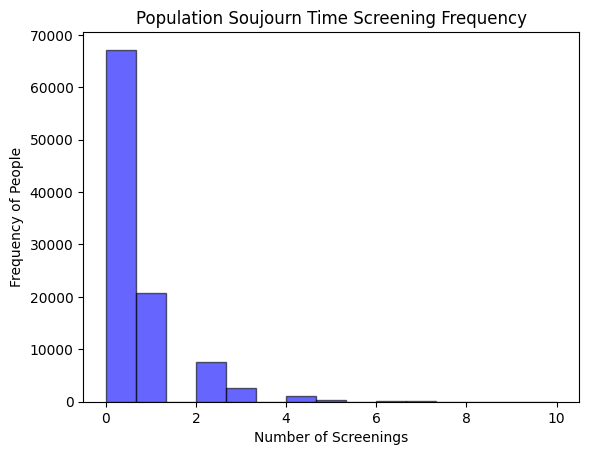

In [19]:
# How can I verify the results visually?
# - Summary statistics

# Number of screenings
print("Screening Summary Statistics")
sojourn_time_screenings = histories['all_screening_times'].apply(len)
print(sojourn_time_screenings.describe())

plt.hist(sojourn_time_screenings, bins=15, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Number of Screenings')
plt.ylabel('Frequency of People')
plt.title('Population Soujourn Time Screening Frequency')
plt.show()

#### Interval Cancers

Interval Cancer Statistics
Proportion of people with cancer who were not detected: 69376 70%


Propertion of people with no screenings in sojourn period: 67158 67%
Proportion not detected due to no screening: 97%


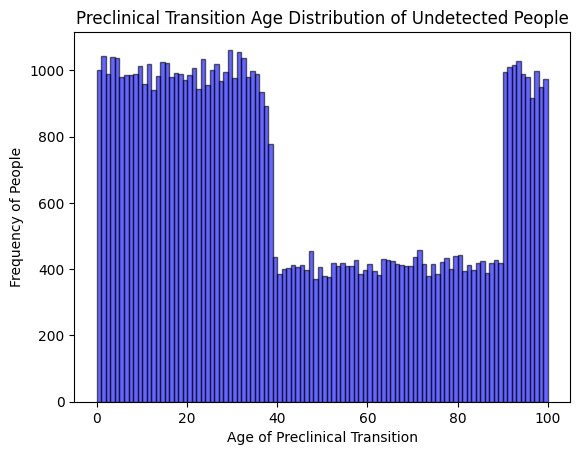

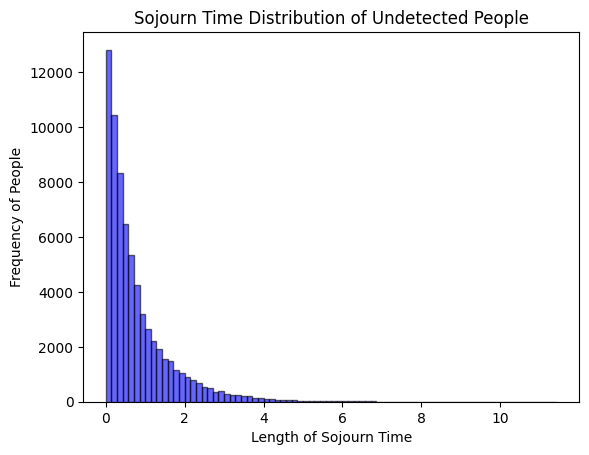

In [20]:
# - Aggregate by reasons for not being caught

print('Interval Cancer Statistics')
undetected_indices = histories[~histories['detected']]
print('Proportion of people with cancer who were not detected:', len(undetected_indices), 
    '{:.0%}'.format(len(undetected_indices)/len(histories)))
no_screening_times_indices = histories[histories['all_screening_times'].apply(len) == 0] 
print('Propertion of people with no screenings in sojourn period:', len(no_screening_times_indices),
    '{:.0%}'.format(len(no_screening_times_indices)/len(histories)))
print('Proportion not detected due to no screening:', 
    '{:.0%}'.format(len(no_screening_times_indices)/len(undetected_indices)))

plt.hist(undetected_indices['t_w'], bins=100, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Age of Preclinical Transition')
plt.ylabel('Frequency of People')
plt.title('Preclinical Transition Age Distribution of Undetected People')
plt.show()

plt.hist(undetected_indices['t_q'] - undetected_indices['t_w'], bins=80, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Length of Sojourn Time')
plt.ylabel('Frequency of People')
plt.title('Sojourn Time Distribution of Undetected People')
plt.show()

##### Late Age Preclinical Transition

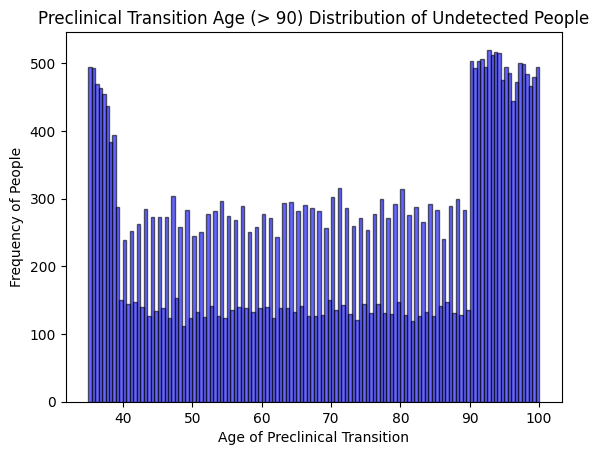

In [21]:
elderly_undetected = undetected_indices[undetected_indices['t_w'] > 35]
plt.hist(elderly_undetected['t_w'], bins=130, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Age of Preclinical Transition')
plt.ylabel('Frequency of People')
plt.title('Preclinical Transition Age (> 90) Distribution of Undetected People')
plt.show()

# focus on one year (should be exponential)

##### Screening Frequency of Interval Cancers

Undetected Cancer Screening Frequency Summary Statistics
count    69376.000000
mean         0.033167
std          0.185790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: all_screening_times, dtype: float64


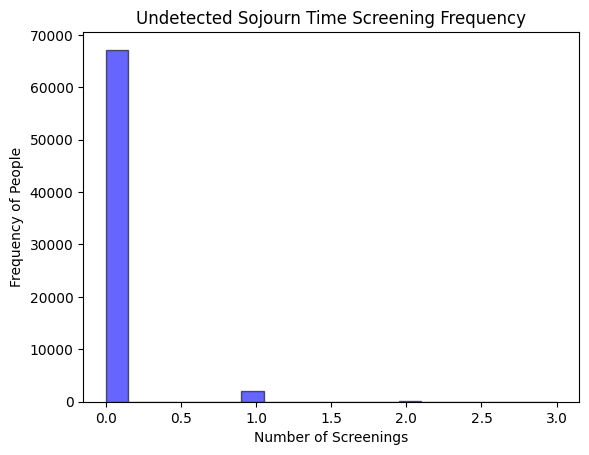

In [22]:
undetected_all_screening_times = undetected_indices['all_screening_times'].apply(len)

print("Undetected Cancer Screening Frequency Summary Statistics")
print(undetected_all_screening_times.describe())

plt.hist(undetected_all_screening_times, bins=20, density=False, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Number of Screenings')
plt.ylabel('Frequency of People')
plt.title('Undetected Sojourn Time Screening Frequency')
plt.show()